In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
QiskitRuntimeService.save_account(
  token="", # Use the 44-character API_KEY you created and saved from the IBM Quantum Platform Home dashboard
  name="QuantumTut", # Optional
  instance="crn:v1:bluemix:public:quantum-computing:us-east:a/5f61ff06ea3f49e59b409ea9e841caef:45ca65d9-2b04-4db0-bb79-3cf0beb35656::", # Optional
  set_as_default=True, # Optional
  overwrite=True, # Optional
)

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
# run every time you need the service
service = QiskitRuntimeService(name="QuantumTut")

management.get:WARNING:2025-10-20 22:48:06,171: Loading saved account: QuantumTut


# Standard Gates

https://quantum.cloud.ibm.com/docs/en/api/qiskit/circuit_library#standard-gates

In [16]:
from qiskit.circuit.library import XGate
gate = XGate()
print(gate.to_matrix())             # X gate
print(gate.power(1/2).to_matrix())  # √X gate -- see also the SXGate
print(gate.control(1).to_matrix())  # CX (controlled X) gate

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
[[0.5+0.5j 0.5-0.5j]
 [0.5-0.5j 0.5+0.5j]]
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


In [17]:
from qiskit.circuit.library import get_standard_gate_name_mapping
 
gate_name_map = get_standard_gate_name_mapping()
cx_object = gate_name_map["cx"]
 
print(cx_object)
print(type(cx_object))

Instruction(name='cx', num_qubits=2, num_clbits=0, params=[])
<class '_SingletonCXGate'>


In [18]:
# Generalized Gates = number of qubits depends on the input
from qiskit.circuit.library import DiagonalGate
 
diagonal = DiagonalGate([1, 1j])
print(diagonal.num_qubits)
 
diagonal = DiagonalGate([1, 1, 1, -1])
print(diagonal.num_qubits)

1
2


**Standard Operations**

Operations are non-reversible changes in the quantum state of the circuit.

- Measure
- Reset

**Boolean Logic**
- `AndGate(num_variable_qubits[, flags])`	A gate representing the logical AND operation on a number of qubits.
- `OrGate(num_variable_qubits[, flags])`	A gate representing the logical OR operation on a number of qubits.
- `BitwiseXorGate(num_qubits, amount)`	An n-qubit gate for bitwise xor-ing the input with some integer amount.
- `InnerProductGate(num_qubits)`	A 2n-qubit Boolean function that computes the inner product of two n-qubit

# Quantum Circuits

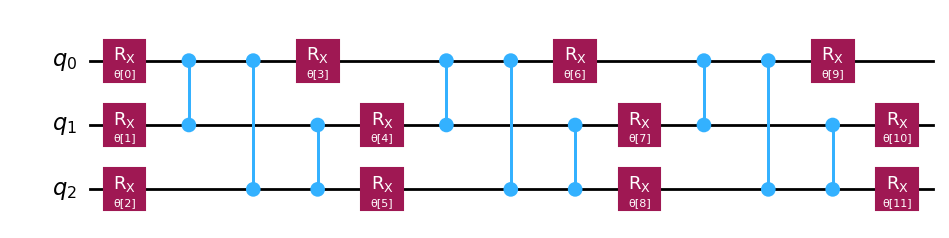

In [ ]:
from qiskit.circuit.library import n_local
 
two_local = n_local(3, "rx", "cz")
two_local.draw("mpl")

In [22]:
two_local.parameters

ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9]), ParameterVectorElement(θ[10]), ParameterVectorElement(θ[11])])

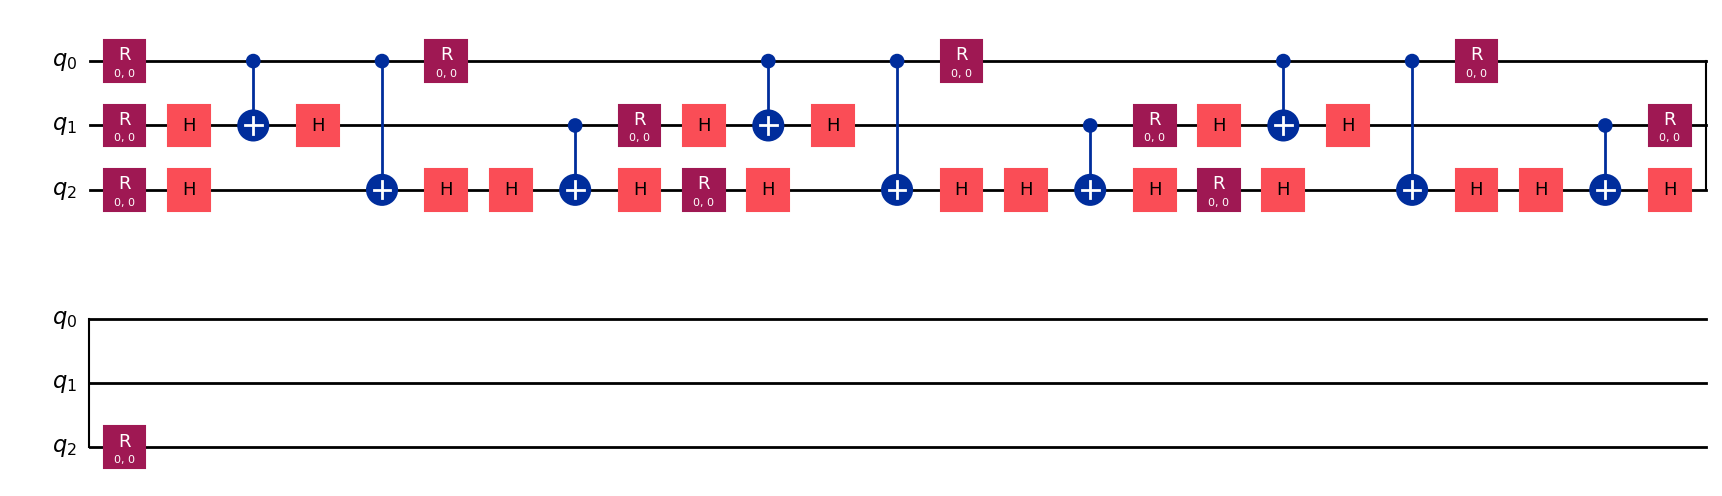

In [23]:
bound_circuit = two_local.assign_parameters(
    {p: 0 for p in two_local.parameters}
)
bound_circuit.decompose().draw("mpl")

**Data-encoding circuits**

These parameterized circuits encode data onto quantum states for processing by quantum machine learning algorithms. Some circuits supported by Qiskit are:

- Amplitude encoding, which encodes each number into the amplitude of a basis state, costly to implement.
- Basis encoding, which encodes an integer k by preparing the corresponding basis state ∣k⟩.
- Angle encoding, which sets each number in the data as a rotation angle in a parameterized circuit.

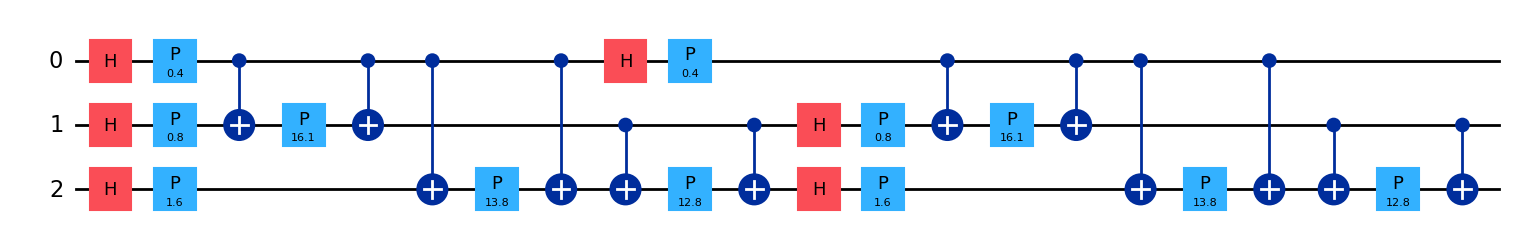

In [24]:
from qiskit.circuit.library import zz_feature_map

# angle-encoding with zz_feature_map
features = [0.2, 0.4, 0.8]
feature_map = zz_feature_map(feature_dimension=len(features))
 
encoded = feature_map.assign_parameters(features)
encoded.draw("mpl")

**Time-evolution circuits**

Important for QAOA - optimization problem

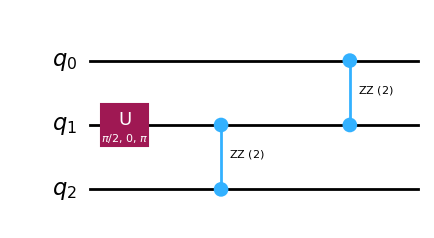

In [66]:
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
 
 
# Prepare an initial state with a Hadamard on the middle qubit
state = QuantumCircuit(3)
state.h(1)
 
hamiltonian = SparsePauliOp(["ZZI", "IZZ"])
evolution = PauliEvolutionGate(hamiltonian, time=1)
 
# Evolve state by appending the evolution gate
state.compose(evolution, inplace=True)
 
state.decompose().draw("mpl")

**Arithmetic circuits**

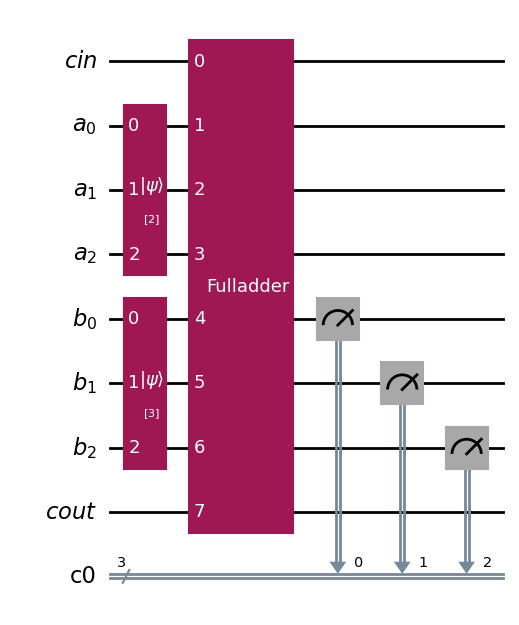

In [25]:
from qiskit.circuit.library import FullAdderGate
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
 
adder = FullAdderGate(3)  # Adder of 3-bit numbers
 
# Create the number A=2
reg_a = QuantumRegister(3, "a")
number_a = QuantumCircuit(reg_a)
number_a.initialize(2)  # Number 2; |010>
 
# Create the number B=3
reg_b = QuantumRegister(3, "b")
number_b = QuantumCircuit(reg_b)
number_b.initialize(3)  # Number 3; |011>
 
# Create a circuit to hold everything, including a classical register for
# the result
qregs = [
    QuantumRegister(1, "cin"),
    QuantumRegister(3, "a"),
    QuantumRegister(3, "b"),
    QuantumRegister(1, "cout"),
]
reg_result = ClassicalRegister(3)
circuit = QuantumCircuit(*qregs, reg_result)
 
# Compose number initializers with the adder. Adder stores the result to
# register B, so we'll measure those qubits.
circuit = (
    circuit.compose(number_a, qubits=reg_a)
    .compose(number_b, qubits=reg_b)
    .compose(adder)
)
circuit.measure(reg_b, reg_result)
circuit.draw("mpl")

In [26]:
# Simulating the circuit shows that it outputs 5 for all 1024 shots 

from qiskit.primitives import StatevectorSampler
 
result = StatevectorSampler().run([circuit]).result()
 
print(f"Count data:\n {result[0].data.c0.get_int_counts()}")

Count data:
 {5: 1024}


# Contruct circuits

A simple quantum circuit is a collection of qubits and a list of instructions that act on those qubits.

In [27]:
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(2)
qc.qubits

[<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>]

Multiple `QuantumRegister` and `ClassicalRegister` objects can be combined to create a circuit

In [29]:
from qiskit.circuit import QuantumRegister, ClassicalRegister
 
qr1 = QuantumRegister(2, "qreg1")  # Create a QuantumRegister with 2 qubits
qr2 = QuantumRegister(1, "qreg2")  # Create a QuantumRegister with 1 qubit
cr1 = ClassicalRegister(3, "creg1")  # Create a ClassicalRegister with 3 cbits
 
combined_circ = QuantumCircuit(
    qr1, qr2, cr1
)  # Create a quantum circuit with 2 QuantumRegisters and 1 ClassicalRegister
combined_circ.qubits

[<Qubit register=(2, "qreg1"), index=0>,
 <Qubit register=(2, "qreg1"), index=1>,
 <Qubit register=(1, "qreg2"), index=0>]

In [ ]:
# find a qubit's index and register
desired_qubit = qr2[0]  # Qubit 0 of register 'qreg2'
 
print("Index:", combined_circ.find_bit(desired_qubit).index)
print("Register:", combined_circ.find_bit(desired_qubit).registers)

Index: 2
Register: [(QuantumRegister(1, 'qreg2'), 0)]


Adding an instruction to the circuit appends the instruction to the circuit's `data` attribute. 

`data` is a list of `CircuitInstruction` objects, each of which has an operation attribute, and a qubits attribute.

In [31]:
qc.x(0)  # Add X-gate to qubit 0
qc.data

[CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>,), clbits=())]

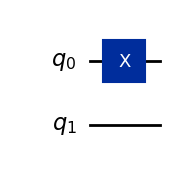

In [32]:
qc.draw("mpl")

**Build circuits**

Methods such as `QuantumCircuit.h` and `QuantumCircuit.cx` add specific instructions to circuits. To add instructions to a circuit more generally, use the `append` method.

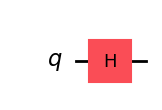

In [34]:
from qiskit.circuit.library import HGate
 
qc = QuantumCircuit(1)
qc.append(
    HGate(),  # New HGate instruction
    [0],  # Apply to qubit 0
)
qc.draw("mpl")

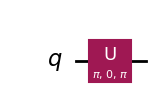

In [ ]:
# Draw definition circuit of 0th instruction in `qc`
# the X-gate is defined as a specific case of the U3-gate, a more general single-qubit gate.

qc.data[0].operation.definition.draw("mpl")

To combine two circuits, use the `compose` method. This accepts another `QuantumCircuit` and an optional list of qubit mappings.

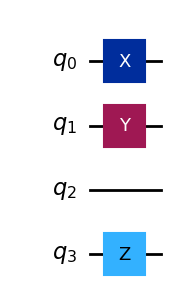

In [35]:
qc_a = QuantumCircuit(4)
qc_a.x(0)
 
qc_b = QuantumCircuit(2, name="qc_b")
qc_b.y(0)
qc_b.z(1)
 
# compose qubits (0, 1) of qc_a to qubits (1, 3) of qc_b respectively
combined = qc_a.compose(qc_b, qubits=[1, 3])
combined.draw("mpl")

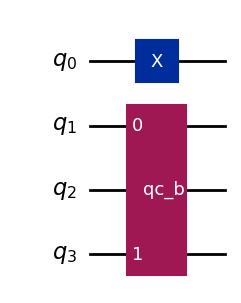

In [36]:
# convert a circuit to an instruction then append, same as above
inst = qc_b.to_instruction()
qc_a.append(inst, [1, 3])
qc_a.draw("mpl")

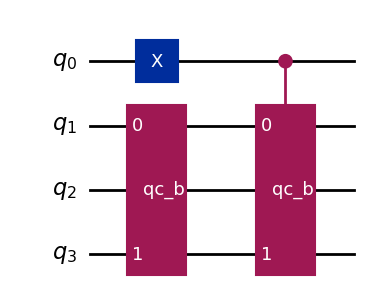

In [38]:
# if unitary, can convert to gate
gate = qc_b.to_gate().control()
qc_a.append(gate, [0, 1, 3])
qc_a.draw("mpl")

To see what's going on, can use the `decompose` method to expand each instruction into its definition.

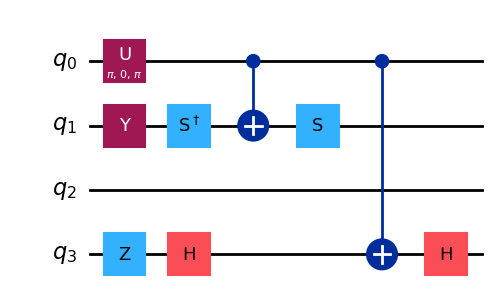

In [39]:
qc_a.decompose().draw("mpl")

**Measurement**

Qubits can be measured using three methods: measure, measure_all and measure_active. To learn how to visualize measured results, see the Visualize results page.

- `QuantumCircuit.measure` : measures each qubit in the first argument onto the classical bit given as the second argument. This method allows full control over where the measurement result is stored.

- `QuantumCircuit.measure_all` : takes no argument and can be used for quantum circuits without pre-defined classical bits. It creates classical wires and stores measurement results in order. It also adds a barrier before the measurement.

- `QuantumCircuit.measure_active` : similar to measure_all, but measures only qubits that have operations.

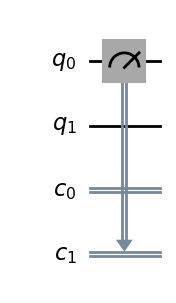

In [40]:
qc1 = QuantumCircuit(2, 2)
qc1.measure(0, 1)
qc1.draw("mpl", cregbundle=False)

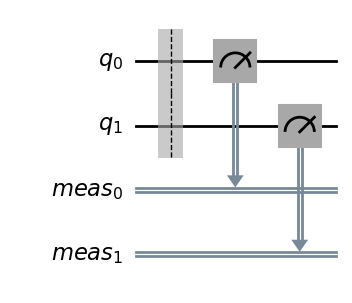

In [41]:
qc2 = QuantumCircuit(2)
qc2.measure_all()
qc2.draw("mpl", cregbundle=False)

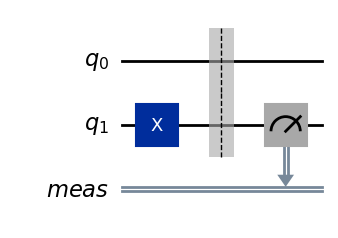

In [42]:
qc3 = QuantumCircuit(2)
qc3.x(1)
qc3.measure_active()
qc3.draw("mpl", cregbundle=False)

**Parameterized circuits**

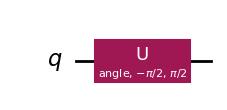

In [67]:
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.circuit import Parameter
 
angle = Parameter("angle")  # undefined number
 
# Create and optimize circuit once
qc = QuantumCircuit(1)
qc.rx(angle, 0)
qc = generate_preset_pass_manager(
    optimization_level=3, basis_gates=["u", "cx"]
).run(qc)
 
qc.decompose().draw("mpl")

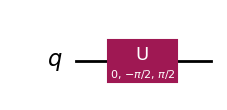

In [44]:
circuits = []
for value in range(100):
    circuits.append(qc.assign_parameters({angle: value}))
 
circuits[0].draw("mpl")

# Hello World

https://quantum.cloud.ibm.com/docs/en/tutorials/hello-world

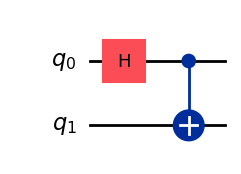

In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl").
# These guides are written by using Jupyter notebooks, which
# display the output of the last line of each cell.
# If you're running this in a script, use `print(qc.draw())` to
# print a text drawing.
qc.draw("mpl")

- operators represent the observables
- return data: probability distribution for a set of qubits or expectation value of an observable
- ZZ operator is a shorthand for the tensor product Z⊗Z, which means measuring Z on qubit 1 and Z on qubit 0 together, and obtaining information about the correlation between qubit 1 and qubit 0.

In [4]:
# Set up six different observables.
 
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

Optimize the circuits and operators

management.get:WARNING:2025-10-20 22:48:18,091: Loading default saved account


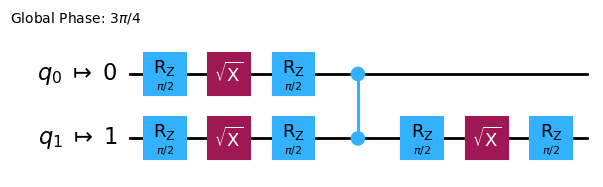

In [5]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService()
 
backend = service.least_busy(simulator=False, operational=True)
 
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
 
isa_circuit.draw("mpl", idle_wires=False)

Execute using the quantum primitives

In [6]:
# Construct the Estimator instance.
 
estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000
 
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
# One pub, with one circuit to run against five different observables.
job = estimator.run([(isa_circuit, mapped_observables)])
 
# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d3r234rnquss73e7034g


In [7]:
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()
 
# This is the result from our single pub, which had six observables,
# so contains information on all six.
pub_result = job.result()[0]

# Quantum Kernel Training

In [10]:
# General Imports and helper functions
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
 
from qiskit.circuit import Parameter, ParameterVector, QuantumCircuit
from qiskit.circuit.library import UnitaryOverlap
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
 
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
 
# from qiskit_serverless import IBMServerlessClient, QiskitFunction
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit_ibm_runtime import SamplerV2 as Sampler, EstimatorV2 as Estimator
 
 
def visualize_counts(res_counts, num_qubits, num_shots):
    """Visualize the outputs from the Qiskit Sampler primitive."""
    zero_prob = res_counts.get(0, 0.0)
    top_10 = dict(
        sorted(res_counts.items(), key=lambda item: item[1], reverse=True)[
            :10
        ]
    )
    top_10.update({0: zero_prob})
    by_key = dict(sorted(top_10.items(), key=lambda item: item[0]))
    x_vals, y_vals = list(zip(*by_key.items()))
    x_vals = [bin(x_val)[2:].zfill(num_qubits) for x_val in x_vals]
    y_vals_prob = []
    for t in range(len(y_vals)):
        y_vals_prob.append(y_vals[t] / num_shots)
    y_vals = y_vals_prob
    plt.bar(x_vals, y_vals)
    plt.xticks(rotation=75)
    plt.title("Results of sampling")
    plt.xlabel("Measured bitstring")
    plt.ylabel("Probability")
    plt.show()
 
 
def get_training_data():
    """Read the training data."""
    df = pd.read_csv("dataset_graph7.csv", sep=",", header=None)
    training_data = df.values[:20, :]
    ind = np.argsort(training_data[:, -1])
    X_train = training_data[ind][:, :-1]
 
    return X_train

In [9]:
!wget https://raw.githubusercontent.com/qiskit-community/prototype-quantum-kernel-training/main/data/dataset_graph7.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\Admin\AppData\Local\Temp\ipykernel_7512\1819656963.py:29: DeprecationWarning: The class ``qiskit.circuit.library.overlap.UnitaryOverlap`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use qiskit.circuit.library.unitary_overlap instead.
  overlap_circ = UnitaryOverlap(unitary1, unitary2)


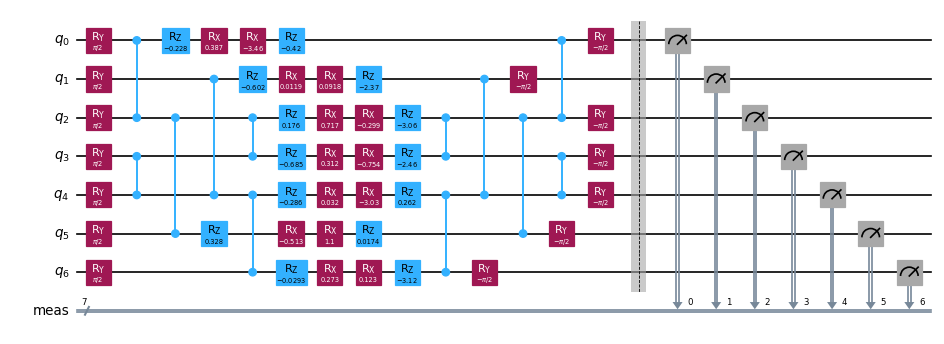

In [11]:
# Prepare training data
X_train = get_training_data()
 
# Empty kernel matrix
num_samples = np.shape(X_train)[0]
kernel_matrix = np.full((num_samples, num_samples), np.nan)
 
# Prepare feature map for computing overlap
num_features = np.shape(X_train)[1]
num_qubits = int(num_features / 2)
entangler_map = [[0, 2], [3, 4], [2, 5], [1, 4], [2, 3], [4, 6]]
fm = QuantumCircuit(num_qubits)
training_param = Parameter("θ")
feature_params = ParameterVector("x", num_qubits * 2)
fm.ry(training_param, fm.qubits)
for cz in entangler_map:
    fm.cz(cz[0], cz[1])
for i in range(num_qubits):
    fm.rz(-2 * feature_params[2 * i + 1], i)
    fm.rx(-2 * feature_params[2 * i], i)
 
# Assign tunable parameter to known optimal value and set the data params for first two samples
x1 = 14
x2 = 19
unitary1 = fm.assign_parameters(list(X_train[x1]) + [np.pi / 2])
unitary2 = fm.assign_parameters(list(X_train[x2]) + [np.pi / 2])
 
# Create the overlap circuit
overlap_circ = UnitaryOverlap(unitary1, unitary2)
overlap_circ.measure_all()
overlap_circ.draw("mpl", scale=0.6, style="iqp")

management.get:WARNING:2025-10-20 22:54:19,956: Loading default saved account


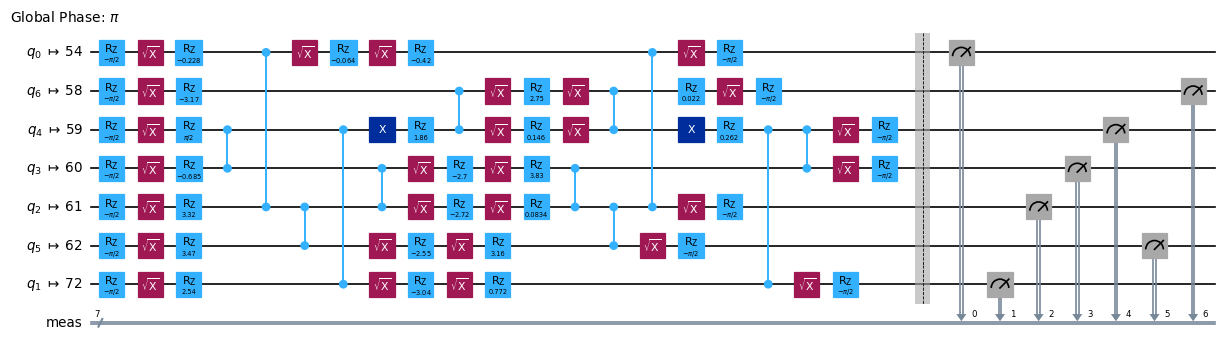

In [12]:
service = QiskitRuntimeService()
backend = service.least_busy(
    operational=True, simulator=False, min_num_qubits=overlap_circ.num_qubits
)
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
overlap_ibm = pm.run(overlap_circ)
overlap_ibm.draw("mpl", scale=0.6, idle_wires=False, fold=-1, style="iqp")

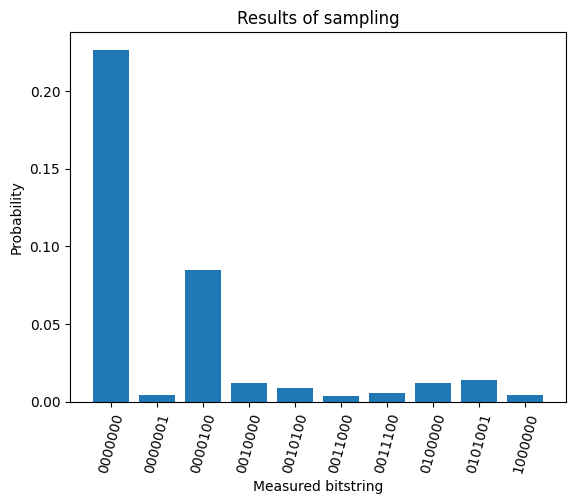

In [13]:
num_shots = 10_000
 
## Evaluate the problem using statevector-based primitives from Qiskit
# from qiskit.primitives import StatevectorSampler
 
# sampler = StatevectorSampler()
# results = sampler.run([overlap_circ]).result()
# counts = results[0].data.meas.get_int_counts()
 
# Evaluate the problem using a QPU via Qiskit IBM Runtime
 
sampler = Sampler(mode=backend)
results = sampler.run([overlap_ibm]).result()
counts = results[0].data.meas.get_int_counts()
 
visualize_counts(counts, num_qubits, num_shots)

In [14]:
# Calculate the fidelity, or the probability to measure 0
kernel_matrix[x1, x2] = counts.get(0, 0.0) / num_shots
print(f"Fidelity: {kernel_matrix[x1, x2]}")

Fidelity: 0.2266


# Variational Algorithms

## High-level

Variational algorithms include several modular components that can be combined and optimized based on algorithm, software, and hardware advancements. This includes:
- `cost function` that describes a specific problem with a set of parameters 
- `ansatz` to express the search space with these parameters
- `optimizer` to iteratively explore the search space. 

1. Initialize problems: a default state ∣0⟩, then transforming it to some desired (non-parametrized) state 
∣ρ⟩, which we will call reference state.
2. Prepare ansatz: variational form + ref state -> ansatz.
3. Evaluate cost function: ~linear combination of Pauli operators.
4. Optimize parameters: in classical way
5. Adjust ansatz param, re-run

**Variational theorems**

A common goal of variational algorithms is to find the quantum state with the lowest or highest eigenvalue of a certain observable. A key insight we'll use is the variational theorem of quantum mechanics.

Observable ~ Hamiltonian

In short, the expected energy of any system is higher than the lowest energy or ground state energy -> parametrized states ∣ψ(θ)⟩ that depend on a parameter vector θ.

Given cost function C, we will have the min always satisfy: (λk k-th eigenvalue or, physically, the k-th energy level)

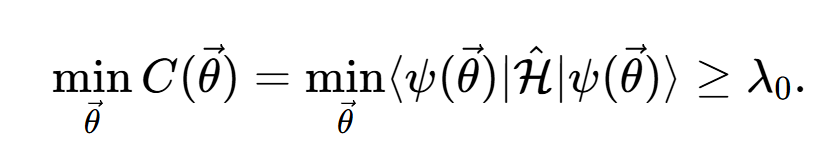

 



## Reference states

**Default state**

A reference state refers to the initial fixed start for our problem.

By applying non-parameterized unitary such that |p| = U|0>

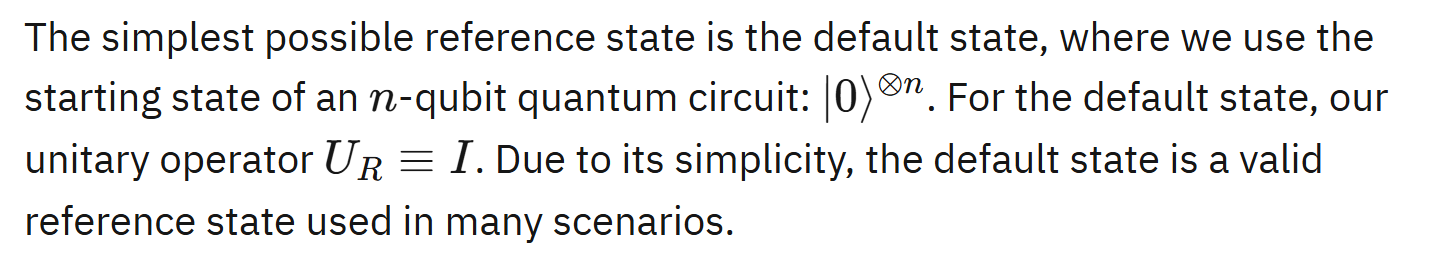

**Classical reference state**

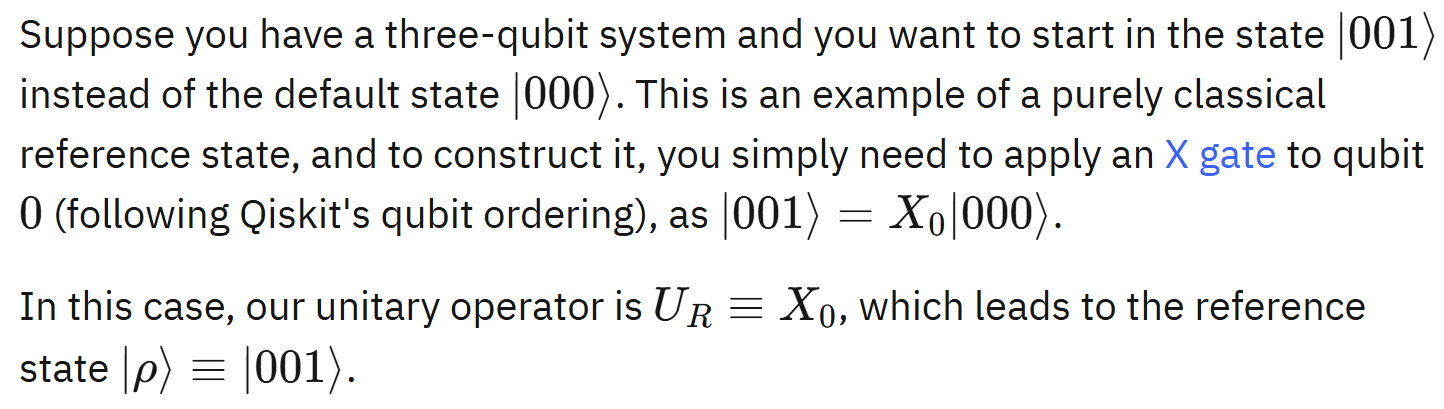

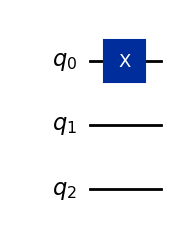

In [45]:
from qiskit import QuantumCircuit
 
qc = QuantumCircuit(3)
qc.x(0)
 
qc.draw("mpl")

**Quantum reference state**

Hadamard gate on qubit 0, a CNOT (CX) gate with qubit 0 as the control qubit and qubit 1 as the target qubit, and finally an X gate applied to qubit 2.

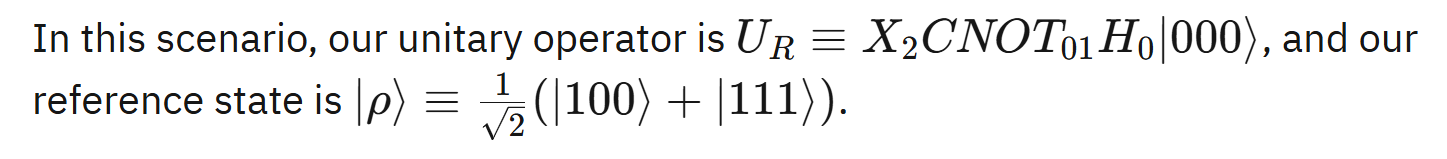

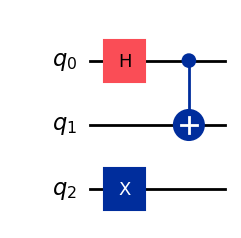

In [46]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.x(2)
 
qc.draw("mpl")

**Constructing Reference States using template circuits**

C:\Users\Admin\AppData\Local\Temp\ipykernel_7512\3760914331.py:4: DeprecationWarning: The class ``qiskit.circuit.library.n_local.two_local.TwoLocal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.n_local instead.
  reference_circuit = TwoLocal(2, "rx", "cz", entanglement="linear", reps=1)


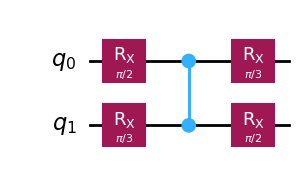

In [47]:
from qiskit.circuit.library import TwoLocal
from math import pi
 
reference_circuit = TwoLocal(2, "rx", "cz", entanglement="linear", reps=1)
theta_list = [pi / 2, pi / 3, pi / 3, pi / 2]
 
reference_circuit = reference_circuit.assign_parameters(theta_list)
 
reference_circuit.decompose().draw("mpl")

**Quantum Machine learning**

In the context of a variational quantum classifier (VQC), the training data is encoded into a quantum state with a parameterized circuit known as a feature map, where each parameter value represents a data point from the training dataset. The `zz_feature_map` is a type of parameterized circuit that can be utilized to pass our data points (x) to this feature map.

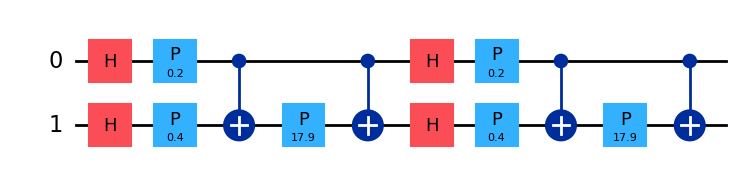

In [49]:
from qiskit.circuit.library import zz_feature_map
 
data = [0.1, 0.2]
 
zz_feature_map_reference = zz_feature_map(feature_dimension=2, reps=2)
zz_feature_map_reference = zz_feature_map_reference.assign_parameters(data)
zz_feature_map_reference.draw("mpl")

## Ansatz and variational forms

**Parameterized Quantum Circuits**

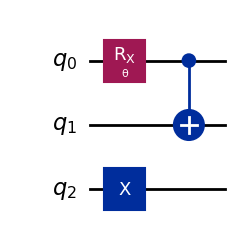

In [50]:
from qiskit.circuit import QuantumCircuit, Parameter
 
theta = Parameter("θ")
 
qc = QuantumCircuit(3)
qc.rx(theta, 0)
qc.cx(0, 1)
qc.x(2)
 
qc.draw("mpl")

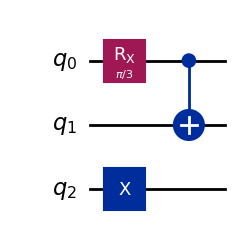

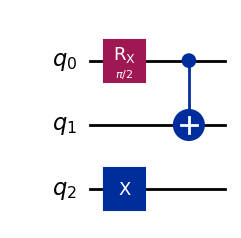

In [51]:
from math import pi
 
angle_list = [pi / 3, pi / 2]
circuits = [qc.assign_parameters({theta: angle}) for angle in angle_list]
 
for circuit in circuits:
    display(circuit.draw("mpl"))

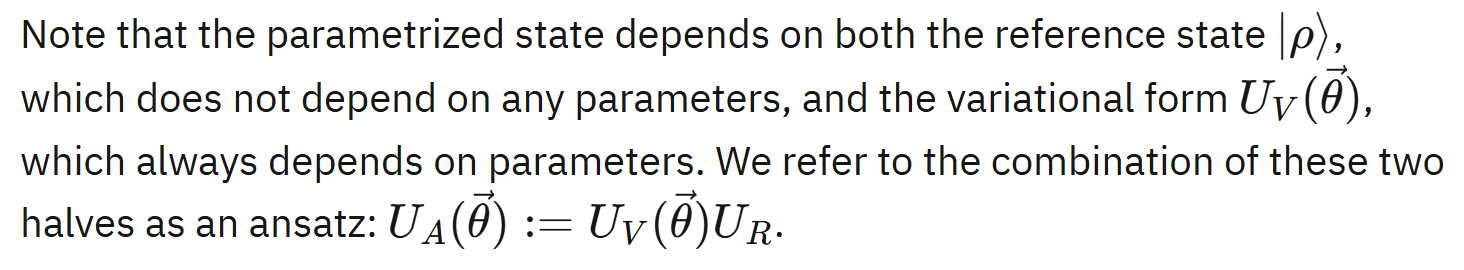

**Heuristic ansaetze and trade-offs**

- Speed: By reducing the search space, the algorithm can run faster.
- Accuracy: Reducing the space could risk excluding the actual solution to the problem, leading to suboptimal solutions.
- Noise: Deeper circuits are affected by noise, so we need to experiment with our ansatz's connectivity, gates, and gate fidelity.

There is a fundamental trade-off between quality (or even solvability) and speed: the more parameters, the more likely you are to find a precise result, but the longer it will take to run the algorithm.

**N-local circuits**

- Easy to implment (simole local gates + small qubit #)
- Capture important correlations

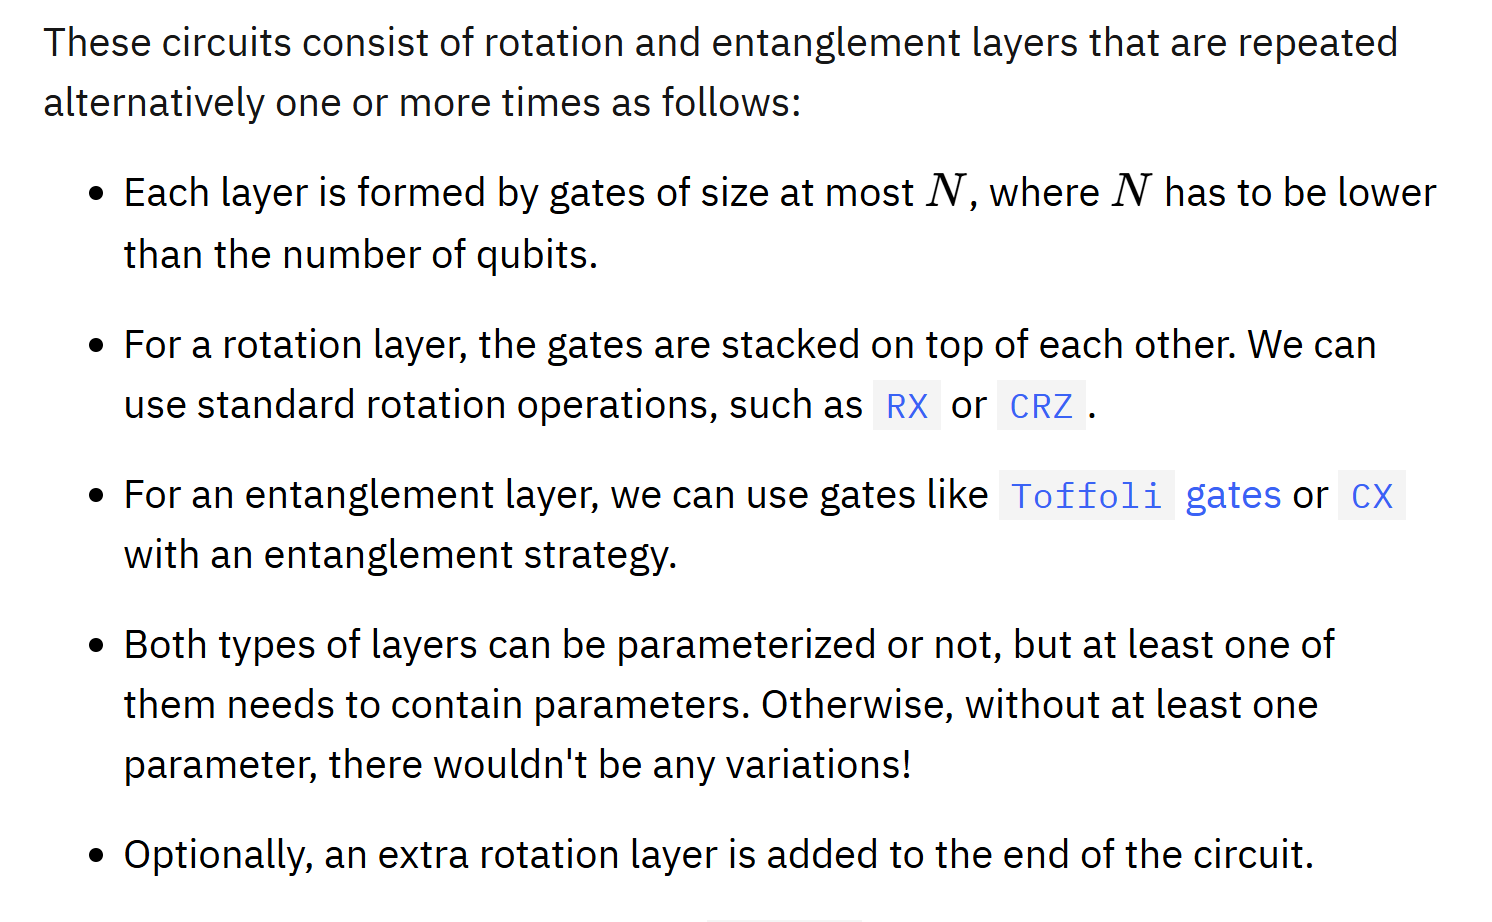

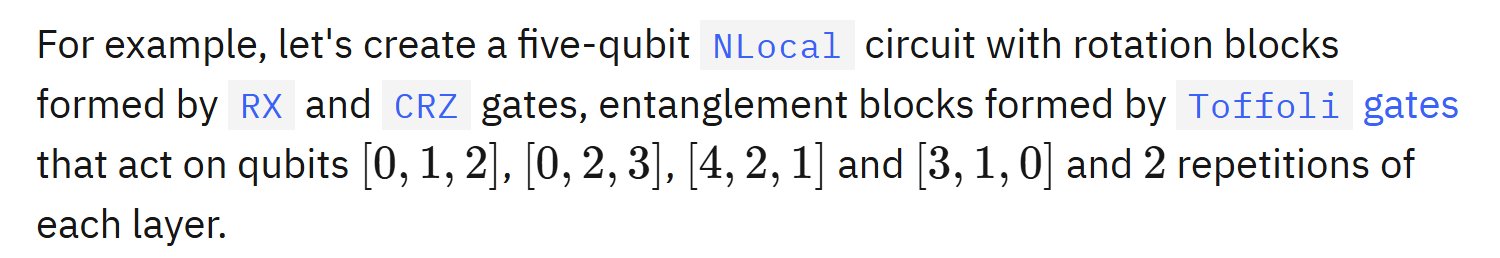

C:\Users\Admin\AppData\Local\Temp\ipykernel_7512\3021040364.py:5: DeprecationWarning: The class ``qiskit.circuit.library.n_local.n_local.NLocal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. This applies to NLocal subclasses too. Use the corresponding function from the module qiskit.circuit.library.n_local instead.
  ansatz = NLocal(


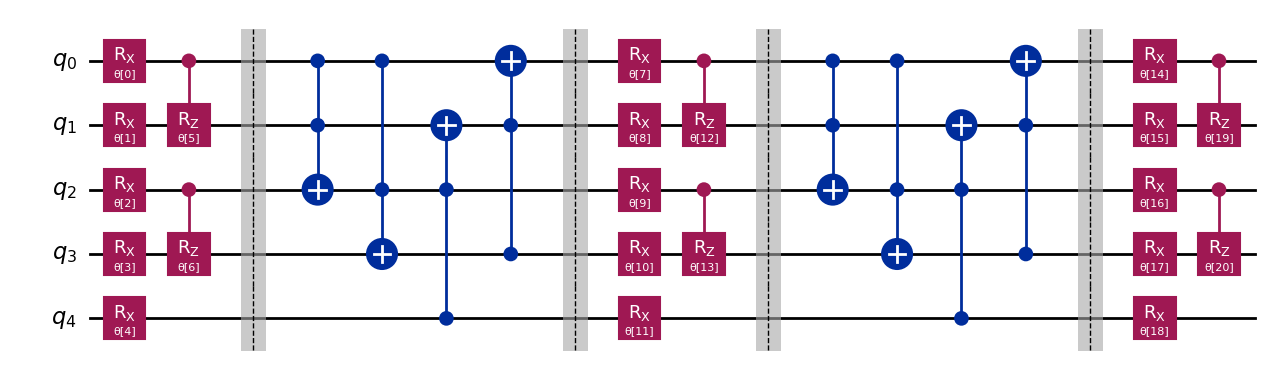

In [54]:
from qiskit.circuit.library import NLocal, CCXGate, CRZGate, RXGate
from qiskit.circuit import Parameter
 
theta = Parameter("θ")
ansatz = NLocal(
    num_qubits=5,
    rotation_blocks=[RXGate(theta), CRZGate(theta)],
    entanglement_blocks=CCXGate(),
    entanglement=[[0, 1, 2], [0, 2, 3], [4, 2, 1], [3, 1, 0]],
    reps=2,
    insert_barriers=True,
)
ansatz.decompose().draw("mpl")

C:\Users\Admin\AppData\Local\Temp\ipykernel_7512\3593352789.py:3: DeprecationWarning: The class ``qiskit.circuit.library.n_local.two_local.TwoLocal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.n_local instead.
  ansatz = TwoLocal(


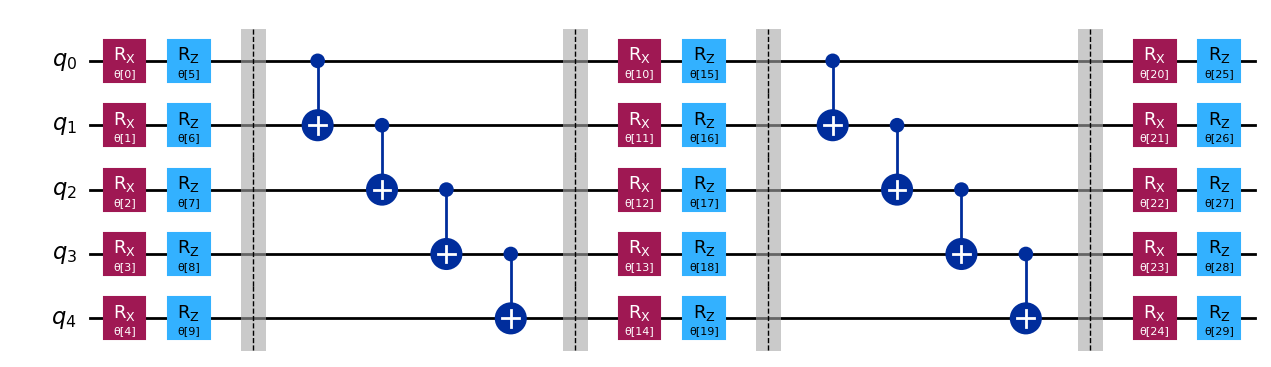

In [55]:
from qiskit.circuit.library import TwoLocal
 
ansatz = TwoLocal(
    num_qubits=5,
    rotation_blocks=["rx", "rz"],
    entanglement_blocks="cx",
    entanglement="linear",
    reps=2,
    insert_barriers=True,
)
ansatz.decompose().draw("mpl")

**Efficient SU2**

efficient_su2 is a hardware-efficient circuit that consists of layers of single-qubit operations spanning SU(2) and CX entanglements.

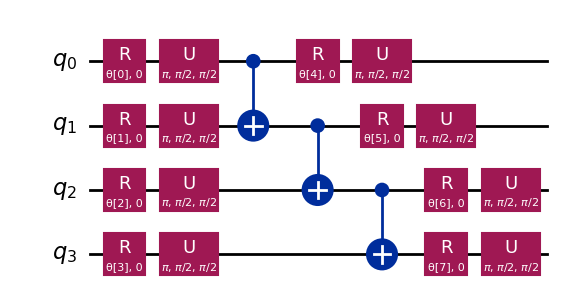

In [56]:
from qiskit.circuit.library import efficient_su2
 
ansatz = efficient_su2(4, su2_gates=["rx", "y"], entanglement="linear", reps=1)
ansatz.decompose().draw("mpl")

**Optimization**

To utilize QAOA algorithm for a max-cut problem, we require a Pauli Hamiltonian such that the minimum expectation value of the operator corresponds to the maximum number of edges between the nodes in two different groups.

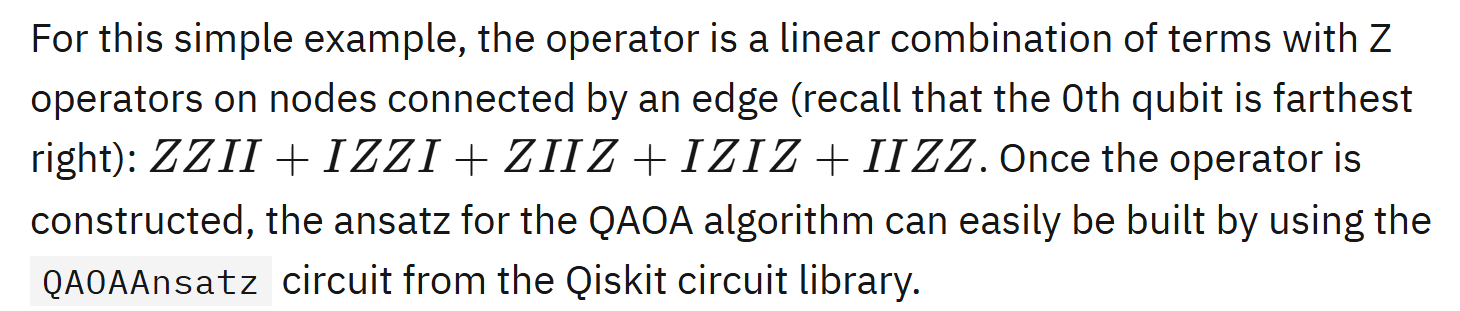

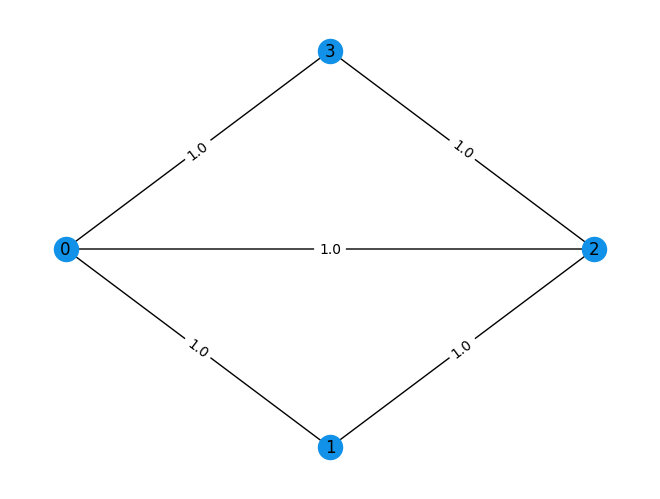

In [57]:
import rustworkx as rx
from rustworkx.visualization import mpl_draw
 
n = 4
G = rx.PyGraph()
G.add_nodes_from(range(n))
# The edge syntax is (start, end, weight)
edges = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)]
G.add_edges_from(edges)
 
mpl_draw(
    G, pos=rx.shell_layout(G), with_labels=True, edge_labels=str, node_color="#1192E8"
)

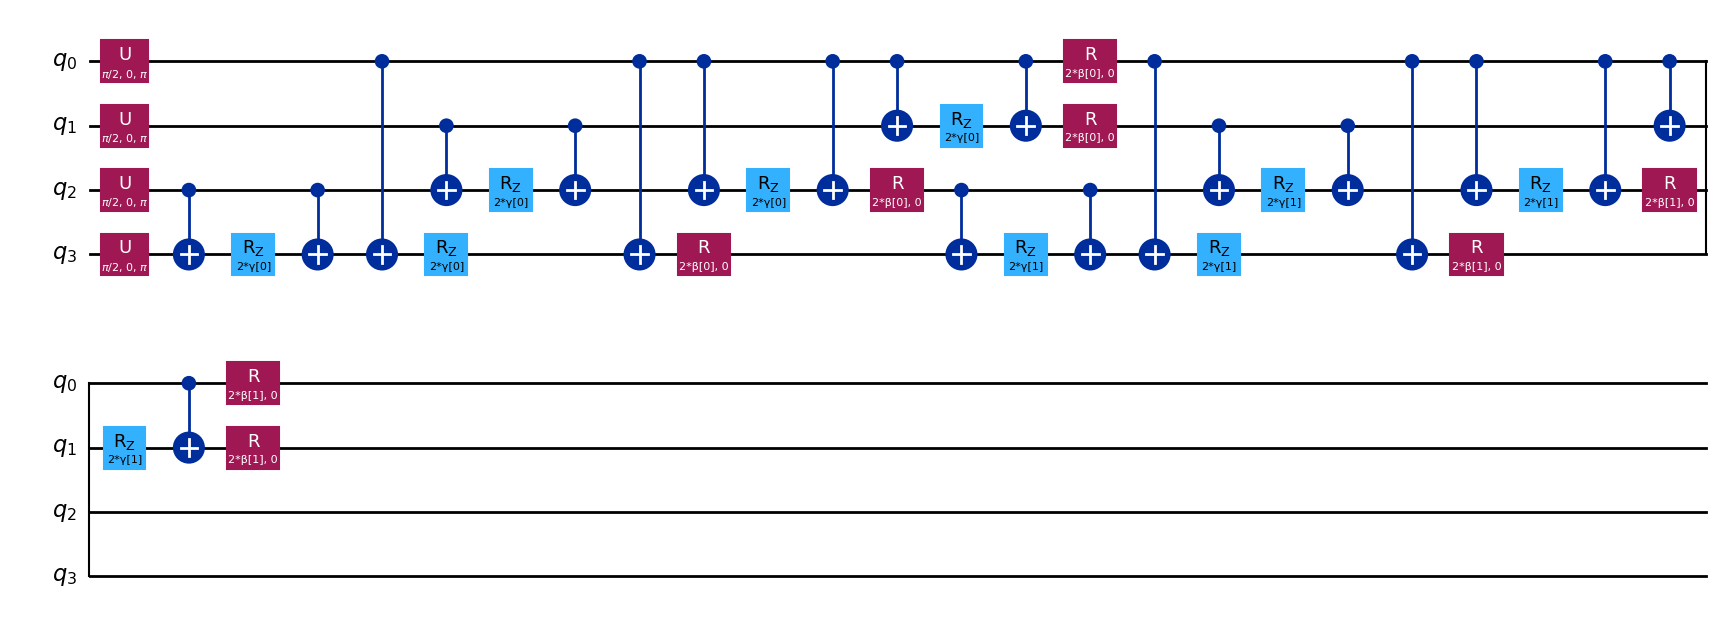

In [59]:
# Pre-defined ansatz circuit, operator class and visualization tools
from qiskit.circuit.library import QAOAAnsatz
from qiskit.quantum_info import SparsePauliOp
 
# Problem to Hamiltonian operator
hamiltonian = SparsePauliOp.from_list(
    [("ZZII", 1), ("IZZI", 1), ("ZIIZ", 1), ("IZIZ", 1), ("IIZZ", 1)]
)
# QAOA ansatz circuit
ansatz = QAOAAnsatz(hamiltonian, reps=2)
# Draw
ansatz.decompose(reps=3).draw("mpl")

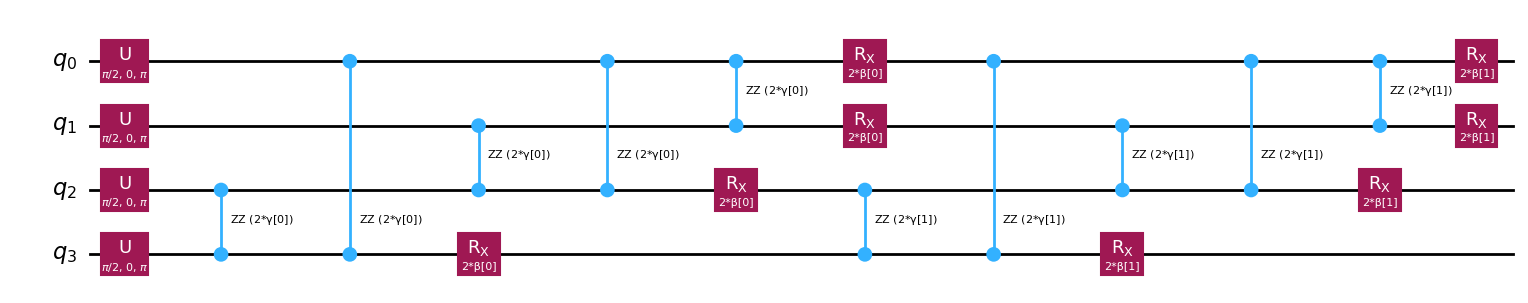

In [60]:
ansatz.decompose(reps=2).draw("mpl")

**Quantum Machine Learning**

Classification tasks: map datapoint into feature map (based on parameterized quantum circuits)

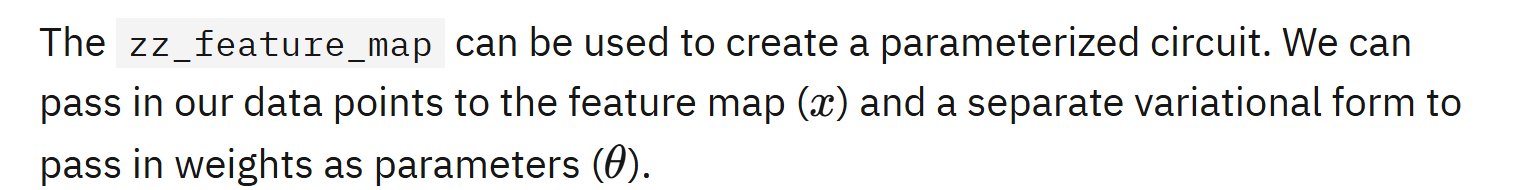

C:\Users\Admin\AppData\Local\Temp\ipykernel_7512\2543941949.py:8: DeprecationWarning: The class ``qiskit.circuit.library.n_local.two_local.TwoLocal`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.n_local instead.
  variation_form = TwoLocal(2, ["ry", "rz"], "cz", reps=2)


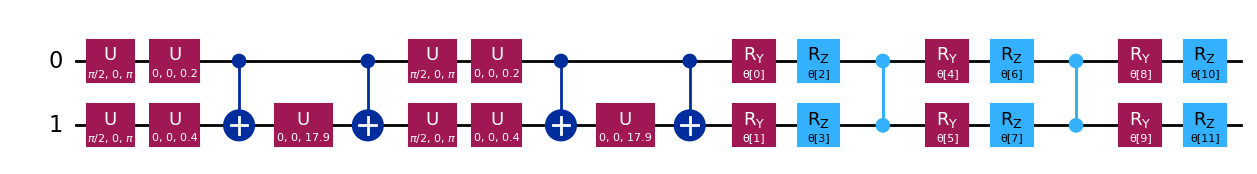

In [63]:
from qiskit.circuit.library import zz_feature_map, TwoLocal
 
data = [0.1, 0.2]
 
zz_feature_map_reference = zz_feature_map(feature_dimension=2, reps=2)
zz_feature_map_reference = zz_feature_map_reference.assign_parameters(data)
 
variation_form = TwoLocal(2, ["ry", "rz"], "cz", reps=2)
vqc_ansatz = zz_feature_map_reference.compose(variation_form)
vqc_ansatz.decompose(reps=1).draw("mpl")


**Primitives**

The state of a quantum system ~ observables, which are mathematical objects.

States ~ kets, observables ~ Hermitian linear operators that act on kets, eigenvetor ~ eigenstate -> measure -> eigenvalue.